In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load in the data
missing_values = ["n/a", "na", "--", "-", "NA"]
payroll = pd.read_csv("city_payroll.csv", na_values = missing_values)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
payroll.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE,ACTIVE,47678.0,per Annum,1830.00,47166.03,2.25,57.28,0.0
1,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT,ACTIVE,119959.0,per Annum,1831.00,119042.50,0.00,0.00,0.0
2,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE,ON LEAVE,39966.0,per Annum,1181.68,27452.62,1.00,21.34,33.0
3,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER,ACTIVE,116000.0,per Annum,1831.00,115104.57,0.00,0.00,0.0
4,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE,CEASED,1.0,per Hour,0.00,3500.00,0.00,0.00,0.0


In [4]:
# number of instances in the original dataset which is pretty huge
payroll.shape

(3333096, 17)

In [5]:
# sample the data to make it more manageable
payroll_sample = payroll.sample(int(len(payroll) / 20))

In [6]:
print("Original Dataset Observation Count: " + str(len(payroll)))
print("Sampled Dataset Observation Count: " + str(len(payroll_sample)))

Original Dataset Observation Count: 3333096
Sampled Dataset Observation Count: 166654


In [7]:
# save sampled dataset
payroll_sample.to_csv("../nyc_payroll/Input/city_payroll_sample.csv")

In [8]:
# number of features
payroll_sample.shape[1]

17

In [9]:
payroll_sample.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
613118,2015,NaN,ADMIN FOR CHILDREN'S SVCS,JAMES,BEVERLY,NaN,06/23/1996,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,131011.00,per Annum,1825.0,137013.81,0.0,0.00,1000.00
895571,2015,NaN,DEPT OF ED PEDAGOGICAL,TURAY,ANDREW,M,10/30/1984,OTHER,PRINCIPAL,CEASED,154295.00,per Annum,0.0,171933.70,0.0,0.00,1002.04
1033517,2015,NaN,DEPT OF PARKS & RECREATION,BROWN,ZACHARY,B,09/27/2012,QUEENS,JOB TRAINING PARTICIPANT,CEASED,9.39,per Hour,0.0,173.98,0.0,0.27,0.00
1869047,2017,NaN,DEPT OF ED PEDAGOGICAL,GARBER,RACHEL,A,09/02/2003,MANHATTAN,TEACHER,ACTIVE,92087.00,per Annum,0.0,88366.68,0.0,0.00,0.00
2261309,2018,102.0,CITY COUNCIL,PEREZ,ROSY,NaN,05/18/2015,MANHATTAN,LEGISLATIVE ADMINISTRATIVE ASSISTANT,ACTIVE,42230.00,per Annum,1790.0,42114.28,0.0,0.00,0.00


In [10]:
# printing feature names
print("Feature Names: \n\n" + "\n".join(payroll_sample.columns))

Feature Names: 

Fiscal Year
Payroll Number
Agency Name
Last Name
First Name
Mid Init
Agency Start Date
Work Location Borough
Title Description
Leave Status as of June 30
Base Salary
Pay Basis
Regular Hours
Regular Gross Paid
OT Hours
Total OT Paid
Total Other Pay


In [11]:
# data types
print("Datatypes: \n\n", payroll_sample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166654 entries, 613118 to 1223617
Data columns (total 17 columns):
Fiscal Year                   166654 non-null int64
Payroll Number                79223 non-null float64
Agency Name                   166654 non-null object
Last Name                     166576 non-null object
First Name                    166574 non-null object
Mid Init                      98772 non-null object
Agency Start Date             166654 non-null object
Work Location Borough         141493 non-null object
Title Description             166651 non-null object
Leave Status as of June 30    166654 non-null object
Base Salary                   166654 non-null float64
Pay Basis                     166654 non-null object
Regular Hours                 166654 non-null float64
Regular Gross Paid            166654 non-null float64
OT Hours                      166654 non-null float64
Total OT Paid                 166654 non-null float64
Total Other Pay               16

In [12]:
# converting Fiscal Year and Agency Start Date to Datetime64
payroll_sample["Agency Start Date"] = pd.to_datetime(payroll_sample["Agency Start Date"], errors = "coerce")
payroll_sample["Agency Name"] = payroll_sample["Agency Name"].astype(str)

print("", payroll_sample.dtypes)

 Fiscal Year                            int64
Payroll Number                       float64
Agency Name                           object
Last Name                             object
First Name                            object
Mid Init                              object
Agency Start Date             datetime64[ns]
Work Location Borough                 object
Title Description                     object
Leave Status as of June 30            object
Base Salary                          float64
Pay Basis                             object
Regular Hours                        float64
Regular Gross Paid                   float64
OT Hours                             float64
Total OT Paid                        float64
Total Other Pay                      float64
dtype: object


In [13]:
# any missing values?
payroll_sample.isnull().values.any()

True

In [14]:
# total number of missing values
payroll_sample.isnull().sum().sum()

180653

In [15]:
# how many missing values per feature?
payroll_sample.isnull().sum()

Fiscal Year                       0
Payroll Number                87431
Agency Name                       0
Last Name                        78
First Name                       80
Mid Init                      67882
Agency Start Date                18
Work Location Borough         25161
Title Description                 3
Leave Status as of June 30        0
Base Salary                       0
Pay Basis                         0
Regular Hours                     0
Regular Gross Paid                0
OT Hours                          0
Total OT Paid                     0
Total Other Pay                   0
dtype: int64

In [16]:
# percentage of missing values for each feature

values = payroll_sample.isnull().sum().sort_values(ascending=False)
percent = payroll_sample.isnull().mean().sort_values(ascending=False)
percent *= 100
missing_data = pd.concat([values, percent], axis=1, keys=['Values', 'Percent'])
missing_data.head(20)

,Values,Percent
Payroll Number,87431,52.462587
Mid Init,67882,40.732296
Work Location Borough,25161,15.097747
First Name,80,0.048004
Last Name,78,0.046804
Agency Start Date,18,0.010801
Title Description,3,0.001800
Agency Name,0,0.000000
Total Other Pay,0,0.000000
Total OT Paid,0,0.000000


### Since Work Location Borough is important we'll keep it and take care of 1 observation in title description variable and keep the variable

In [17]:
# dealing or removing missing data with greater than 20 percent data missing
payroll_sample = payroll_sample.drop((missing_data[missing_data['Percent'] > 20]).index,1)
payroll_sample = payroll_sample.drop(payroll_sample.loc[payroll_sample['Title Description'].isnull()].index)
payroll_sample.isnull().sum().max()

25161

### Since First and Last names are not as important for our project we'll just drop them

In [18]:
payroll_sample = payroll_sample.drop(["First Name", "Last Name"], axis=1)

In [19]:
values = payroll_sample.isnull().sum().sort_values(ascending=False)
percent = payroll_sample.isnull().mean().sort_values(ascending=False)
percent *= 100
missing_data = pd.concat([values, percent], axis=1, keys=['Values', 'Percent'])
missing_data.head()

,Values,Percent
Work Location Borough,25161,15.098019
Agency Start Date,18,0.010801
Total Other Pay,0,0.000000
Total OT Paid,0,0.000000
OT Hours,0,0.000000


In [20]:
# any missing values?
payroll_sample.isnull().values.any()

True

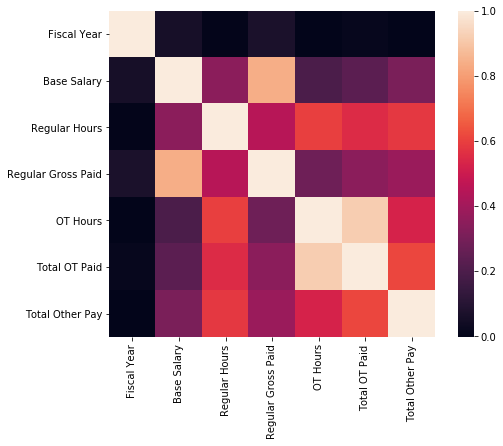

In [21]:
# correlation

corrmap = payroll_sample.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmap, vmax=1, square=True)

In [22]:
pearsoncorr = payroll_sample.corr(method='pearson')
pearsoncorr

,Fiscal Year,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
Fiscal Year,1.000000,0.059331,0.002348,0.069536,-0.000791,0.014495,-0.002621
Base Salary,0.059331,1.000000,0.346606,0.842952,0.194892,0.236011,0.310475
Regular Hours,0.002348,0.346606,1.000000,0.448538,0.599197,0.550561,0.584060
Regular Gross Paid,0.069536,0.842952,0.448538,1.000000,0.280622,0.345986,0.384757
OT Hours,-0.000791,0.194892,0.599197,0.280622,1.000000,0.919040,0.529801
Total OT Paid,0.014495,0.236011,0.550561,0.345986,0.919040,1.000000,0.612930
Total Other Pay,-0.002621,0.310475,0.584060,0.384757,0.529801,0.612930,1.000000


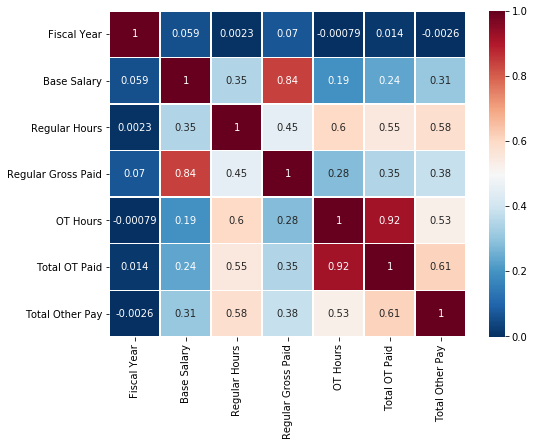

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [24]:
# to be continued...

In [25]:
# total pay of Regular Gross Paid and Total OT Paid (OT = overtime)
payroll_sample["Total Pay"] = payroll_sample["Regular Gross Paid"] + payroll_sample["Total OT Paid"]
payroll_sample.head()

,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Pay
613118,2015,ADMIN FOR CHILDREN'S SVCS,1996-06-23,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,131011.00,per Annum,1825.0,137013.81,0.0,0.00,1000.00,137013.81
895571,2015,DEPT OF ED PEDAGOGICAL,1984-10-30,OTHER,PRINCIPAL,CEASED,154295.00,per Annum,0.0,171933.70,0.0,0.00,1002.04,171933.70
1033517,2015,DEPT OF PARKS & RECREATION,2012-09-27,QUEENS,JOB TRAINING PARTICIPANT,CEASED,9.39,per Hour,0.0,173.98,0.0,0.27,0.00,174.25
1869047,2017,DEPT OF ED PEDAGOGICAL,2003-09-02,MANHATTAN,TEACHER,ACTIVE,92087.00,per Annum,0.0,88366.68,0.0,0.00,0.00,88366.68
2261309,2018,CITY COUNCIL,2015-05-18,MANHATTAN,LEGISLATIVE ADMINISTRATIVE ASSISTANT,ACTIVE,42230.00,per Annum,1790.0,42114.28,0.0,0.00,0.00,42114.28


(500000, 600000)

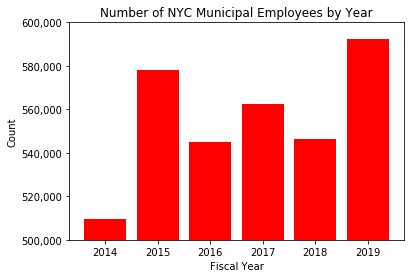

In [27]:
# counts of municipal employees (use full dataset since you're interested in purely counts)
    ## year-to-year
payroll_year_counts = payroll["Fiscal Year"].value_counts()
#plt.bar(payroll_year_counts.index, payroll_year_counts.values, color = "r")
#plt.ylim(500000, 600000) # to make the differences between each year stand out more...
#plt.title("Number of NYC Municipal Employees by Year")
#plt.xlabel("Fiscal Year")
#plt.ylabel("Count")

import matplotlib.ticker as tkr

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func) 

ax = plt.subplot(111)
ax.bar(payroll_year_counts.index, payroll_year_counts.values, color = "r")
ax.yaxis.set_major_formatter(y_format)
ax.set_title("Number of NYC Municipal Employees by Year")
ax.set_xlabel("Fiscal Year")
ax.set_ylabel("Count")
ax.set_ylim(500000, 600000)

Text(0, 0.5, 'Count')

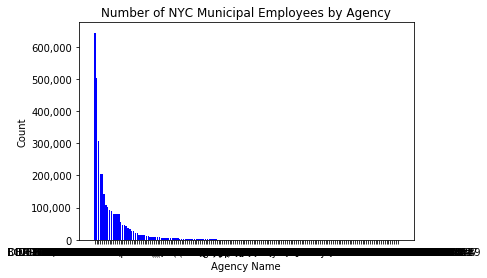

In [28]:
## agency-to-agency
    
payroll_agency_counts = payroll["Agency Name"].value_counts()
ax = plt.subplot(111)
ax.bar(payroll_agency_counts.index, payroll_agency_counts.values, color = "b")
ax.yaxis.set_major_formatter(y_format)
ax.set_title("Number of NYC Municipal Employees by Agency")
ax.set_xlabel("Agency Name")
ax.set_ylabel("Count")
#ax.set_ylim(500000, 600000)

In [47]:
payroll_agency_counts.head(10) #85,000 is a good cutoff

DEPT OF ED PEDAGOGICAL            643361
DEPT OF ED PER SESSION TEACHER    502848
POLICE DEPARTMENT                 307445
BOARD OF ELECTION POLL WORKERS    204209
DEPT OF ED PARA PROFESSIONALS     203906
DEPT OF ED HRLY SUPPORT STAFF     142792
FIRE DEPARTMENT                   109626
DEPT OF PARKS & RECREATION        103204
DEPARTMENT OF EDUCATION ADMIN      93067
HRA/DEPT OF SOCIAL SERVICES        89784
Name: Agency Name, dtype: int64

In [51]:
payroll_agency_counts_filter = payroll_agency_counts >= 85000
payroll_agency_counts_top = payroll_agency_counts[payroll_agency_counts_filter]
payroll_agency_counts_top

DEPT OF ED PEDAGOGICAL            643361
DEPT OF ED PER SESSION TEACHER    502848
POLICE DEPARTMENT                 307445
BOARD OF ELECTION POLL WORKERS    204209
DEPT OF ED PARA PROFESSIONALS     203906
DEPT OF ED HRLY SUPPORT STAFF     142792
FIRE DEPARTMENT                   109626
DEPT OF PARKS & RECREATION        103204
DEPARTMENT OF EDUCATION ADMIN      93067
HRA/DEPT OF SOCIAL SERVICES        89784
Name: Agency Name, dtype: int64

[Text(0, 0, 'DEPT OF ED PEDAGOGICAL'),
 Text(1, 0, 'DEPT OF ED PER SESSION TEACHER'),
 Text(2, 0, 'POLICE DEPARTMENT'),
 Text(3, 0, 'BOARD OF ELECTION POLL WORKERS'),
 Text(4, 0, 'DEPT OF ED PARA PROFESSIONALS'),
 Text(5, 0, 'DEPT OF ED HRLY SUPPORT STAFF'),
 Text(6, 0, 'FIRE DEPARTMENT'),
 Text(7, 0, 'DEPT OF PARKS & RECREATION'),
 Text(8, 0, 'DEPARTMENT OF EDUCATION ADMIN'),
 Text(9, 0, 'HRA/DEPT OF SOCIAL SERVICES')]

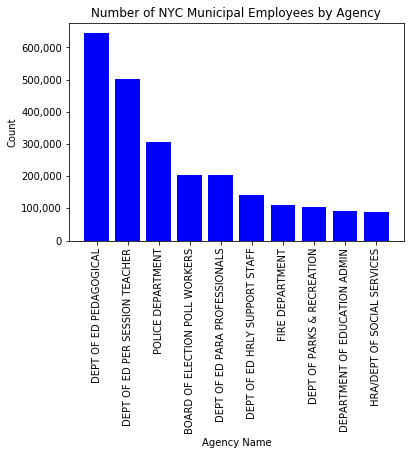

In [53]:
ax = plt.subplot(111)
ax.bar(payroll_agency_counts_top.index, payroll_agency_counts_top.values, color = "b")
ax.yaxis.set_major_formatter(y_format)
ax.set_title("Number of NYC Municipal Employees by Agency")
ax.set_xlabel("Agency Name")
ax.set_ylabel("Count")
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_ylim(500000, 600000)

In [ ]:
    ## borough-to-borough
payroll_borough_counts = payroll["Work Location Borough"].value_counts()
ax = plt.subplot(111)
ax.bar(payroll_borough_counts.index, payroll_borough_counts.values, color = "r")
ax.yaxis.set_major_formatter(y_format)
ax.set_title("Number of NYC Municipal Employees by Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("Count")
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_ylim(500000, 600000)

In [30]:
# distributions of base pay
    # whole
    # by borough 

In [31]:
# distributions of actual pay
    # whole
    # by borough 

In [32]:
# hypothesis testing for actual pay

In [33]:
# distributions of the difference between base pay and actual pay

In [34]:
# distributions of overtime

In [35]:
# bar graph of the pay of active and ceased employees

In [36]:
# bar graph of pay basis

In [37]:
# regular hours vs. base salary scatterplot

In [38]:
# Pearson's R for regular hours vs base salary

In [39]:
# agency start date vs. actual pay

In [40]:
# double bar graph of base salary and regular gross paid 
    # by borough
    # by agency 

In [41]:
# swarm plot of borough vs. regular gross paid 

In [42]:
# swarm plot of fiscal year vs. regular gross paid

In [43]:
# total hours (regular hours + OT Hours) vs regular gross paid

In [44]:
# K-Nearest Neighbor Regressor with k = 5 to predict regular gross paid
    # manually compute for one random observation
    # create a 80/20 train-test split and utilize a k-nearest neighbor algorithm
        # compute mse and rmse
        # regular gross paid vs residuals 